# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

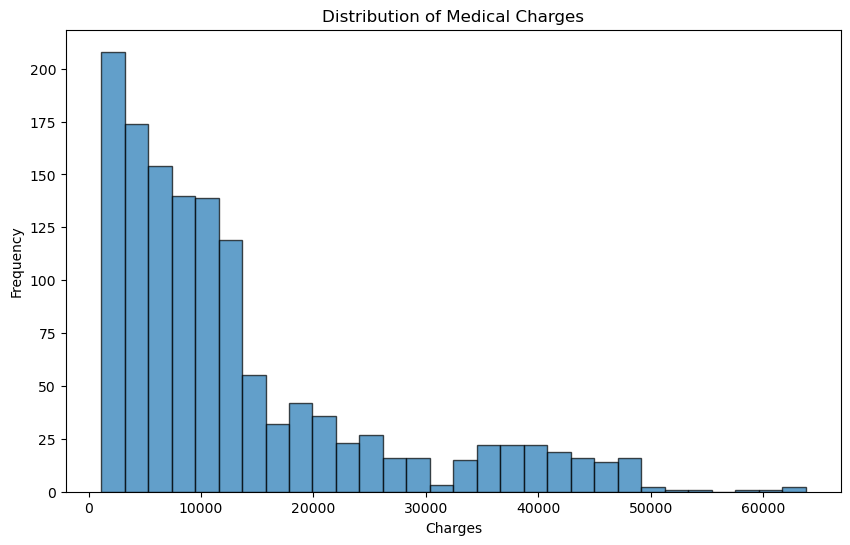

(13270.422265141257, 12110.011236693994)

In [5]:
# Calculate the mean and standard deviation of the 'charges' column
charges_mean = medical['charges'].mean()
charges_std = medical['charges'].std()

# Plot the histogram of the 'charges' column
plt.figure(figsize=(10, 6))
plt.hist(medical['charges'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Charges')
plt.show()

charges_mean, charges_std

__A:__
Mean of medical charges: Approximately 13,270.42
Standard deviation: Approximately 12,110.01
Observations:
The histogram indicates that the distribution of medical charges is highly skewed to the right, with many smaller values and fewer larger charges.
Given this skewness, the mean may not be the best measure of central tendency as it can be influenced by the high charges. Similarly, the standard deviation might not fully represent the spread due to the presence of extreme values.
In such cases, using the median and interquartile range (IQR) could be more appropriate to summarize the data

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
To address the administrator's concern about whether the average charge has fallen below 12,000, we would perform a one-sample t-test.

Justification:
The one-sample t-test is appropriate because we want to compare the mean of our sample data (medical charges) against a known value (12,000) to determine if there is a statistically significant difference.
We use the t-test instead of the z-test because we have a sample rather than the entire population, and we are using the sample's standard deviation to estimate the population standard deviation.
Hypotheses for the test:
Null hypothesis: The mean charge is equal to or greater than 12,000 (𝜇≥12000).
Alternative hypothesis: The mean charge is less than 12,000 (𝜇<12000).
The t-test will help determine if there's enough evidence to reject the null hypothesis and support the claim that the average charge has fallen below 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

In [8]:
# Calculate the critical t-value for a one-sided 95% confidence interval with df = n - 1
n = len(medical['charges'])
df = n - 1
t_critical = t.ppf(0.95, df)

# Calculate the margin of error using the t-value for a one-sided test
margin_of_error_one_sided = t_critical * (charges_std / np.sqrt(n))

# Calculate the lower bound of the one-sided 95% confidence interval
lower_bound_one_sided = charges_mean - margin_of_error_one_sided

# Output the critical value, margin of error, and the one-sided confidence interval
t_critical, margin_of_error_one_sided, (lower_bound_one_sided, charges_mean)

(1.6459941145571317,
 544.9350813250251,
 (12725.48718381623, 13270.422265141257))

__A:__<br>
For the one-sided 95% confidence interval:<br>
Critical t-value: 1.646;<br>
Margin of error: 544.94;<br>
95% Confidence interval (lower bound): (12,725.49, 13,270.42);<br>
Conclusion:<br>
The lower bound of the one-sided confidence interval is 12,725.49, which is above 12,000. Therefore, the administrator should not be concerned, as there's no evidence that the true mean charge has fallen below 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

In [9]:
# Split the data into two groups: those with insurance and those without
insured = medical[medical['insuranceclaim'] == 1]['charges']
not_insured = medical[medical['insuranceclaim'] == 0]['charges']

# Calculate sample sizes, means, and standard deviations for both groups
n0 = len(insured)
n1 = len(not_insured)
mean0 = insured.mean()
mean1 = not_insured.mean()
std0 = insured.std(ddof=1)
std1 = not_insured.std(ddof=1)

# Calculate the pooled standard deviation (sp)
sp = np.sqrt(((n0 - 1) * std0**2 + (n1 - 1) * std1**2) / (n0 + n1 - 2))

# Calculate the t-test statistic
t_statistic = (mean0 - mean1) / (sp * np.sqrt(1/n0 + 1/n1))

# Output the results
n0, n1, mean0, mean1, sp, t_statistic

(783,
 555,
 16423.928276537677,
 8821.421892306305,
 11520.034268775256,
 11.893299030876715)

__A:__<br>
Sample sizes: 783 insured individuals, 555 uninsured individuals
Mean charges:
Insured: 16,423.93
Not insured: 8,821.42
Pooled standard deviation: 11,520.03
t-test statistic: 11.89
Interpretation:
The large t-test statistic (11.89) suggests a significant difference between the average charges for insured and uninsured individuals. We would likely reject the null hypothesis, indicating that there is a statistically significant difference in charges between the two groups. ​

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [11]:
from scipy.stats import ttest_ind

# Perform the t-test for independent samples (equal_var=True since we assume equal variances)
t_statistic_scipy, p_value = ttest_ind(insured, not_insured, equal_var=True)

# Output the manually calculated t-statistic, scipy t-statistic, and p-value
t_statistic, t_statistic_scipy, p_value

(11.893299030876715, 11.893299030876712, 4.461230231620717e-31)

__A:__ <br>
Manually calculated t-statistic: 11.89<br>
t-statistic from scipy.stats: 11.89<br>
p-value: Approximately 4.46×10−31<br>
 
The t-statistic values match perfectly between the manual calculation and the scipy function, confirming the accuracy of both methods. The extremely small p-value indicates a highly significant difference in charges between insured and uninsured individuals, leading us to reject the null hypothesis.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__<br>
In scipy.stats, there is no direct built-in function for performing a z-test. This is because the z-test is less commonly used when sample sizes are small or when the population standard deviation is unknown, which are common scenarios in practice.<br>
The t-test is more flexible as it doesn't require knowing the population standard deviation and is appropriate for smaller sample sizes.<br>
The z-test assumes the population standard deviation is known or the sample size is large enough to approximate it. Since these conditions are rarely met, the t-test is generally preferred.<br>
If a z-test is needed, it can be performed manually using basic calculations with the normal distribution (norm from scipy.stats) by determining the z-score and corresponding p-value.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test